In [1]:
from sklearn.neural_network import MLPClassifier
from numpy.random import rand
from numpy import array, linspace
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.autonotebook import tqdm

%matplotlib inline
plt.style.use('ggplot')

/home/parth/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
class Net(nn.Module):
    def __init__(self, input_size=2, hidden_size=10, num_classes=1, act='Sig'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.act = act
        self.fc2 = nn.Linear(hidden_size, num_classes)  
        
    
    def forward(self, x):
        out = self.fc1(x)
        if self.act == 'Sig':
            out = nn.Sigmoid()(out)
        elif self.act == 'step':
            sign = torch.sign(out)
            out = torch.relu(sign)
        out = self.fc2(out)
        if self.act == 'Sig':
            out = nn.Sigmoid()(out)
        elif self.act == 'step':
            sign = torch.sign(out)
            out = torch.relu(sign)
        return out

device = torch.device('cpu')

In [3]:
def circle(x, y, a, b, r):
    if (x-a)**2 + (y-b)**2 < r**2:
        return 1
    return 0

def generate_data(num_samples = 100):
    data = []
    for n in range(num_samples):
        inp = rand(3)
        inp[2] = circle(inp[0], inp[1], 0.5, 0.6, 0.4)
        data.append(array(inp))
    return array(data)
# generate_data(1)

In [4]:
data = generate_data()
X_train = data[:, :2]
y_train = data[:, 2]
X_train = torch.tensor(X_train).to(device).float()
y_train = torch.tensor(y_train).to(device).float()

In [5]:
test_data = generate_data()
X_test = data[:, :2]
y_test = data[:, 2]
X_test = torch.tensor(X_test).to(device).float()
y_test = torch.tensor(y_test).to(device).float()

In [6]:
results = []
for epochs in tqdm([4, 8, 16, 32, 64, 128, 512, 1024]):
    net = Net().to(device)
    criterion = nn.BCELoss()  
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    for epoch in (range(epochs)):
        optimizer.zero_grad()
        output = net(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    y_pred = net(X_test)
    accuracy = 1 - (torch.abs((y_pred.view(100) - y_test)).sum() / 100)
    results.append({
            'epochs': epochs,
            'score': accuracy
        })

/home/parth/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [7]:
results

[{'epochs': 4, 'score': tensor(0.5086, grad_fn=<RsubBackward1>)},
 {'epochs': 8, 'score': tensor(0.5061, grad_fn=<RsubBackward1>)},
 {'epochs': 16, 'score': tensor(0.5061, grad_fn=<RsubBackward1>)},
 {'epochs': 32, 'score': tensor(0.5068, grad_fn=<RsubBackward1>)},
 {'epochs': 64, 'score': tensor(0.5254, grad_fn=<RsubBackward1>)},
 {'epochs': 128, 'score': tensor(0.5783, grad_fn=<RsubBackward1>)},
 {'epochs': 512, 'score': tensor(0.8278, grad_fn=<RsubBackward1>)},
 {'epochs': 1024, 'score': tensor(0.9351, grad_fn=<RsubBackward1>)}]

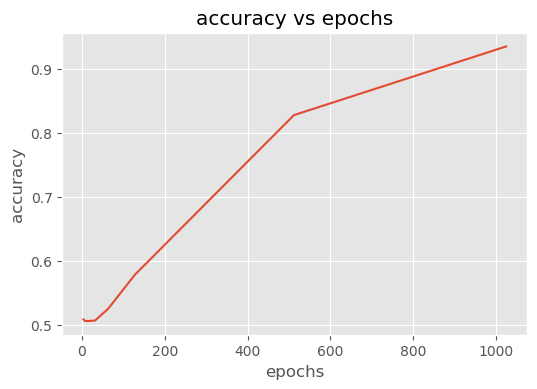

In [8]:
# res = list(filter(lambda r: r['random_state']==1, results))
plt.figure(dpi=100)
plt.plot([r['epochs'] for r in results], [r['score'] for r in results])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy vs epochs')
plt.show()

In [13]:
net = Net().to(device)
criterion = nn.BCELoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
for epoch in (range(1024)):
    optimizer.zero_grad()
    output = net(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

y_pred = net(X_test)
accuracy = 1 - (torch.abs((y_pred.view(100) - y_test)).sum() / 100)

In [14]:
accuracy

tensor(0.9311, grad_fn=<RsubBackward1>)

In [23]:
tmp = list(list(net.children())[0].parameters())
tmp

[Parameter containing:
 tensor([[-9.3319,  3.0889],
         [ 9.1826, -3.9451],
         [-8.6911,  8.8886],
         [ 7.2945,  5.7303],
         [ 8.5308,  2.6289],
         [-9.4479,  5.8308],
         [-2.1928,  9.6072],
         [-3.5218, -7.7547],
         [-6.4136, -7.2291],
         [ 4.8173,  7.7401]], requires_grad=True), Parameter containing:
 tensor([ 5.4359, -5.0140, -4.6292, -4.1341, -9.2555,  4.7171, -5.9498,  3.4044,
          4.6394, -4.0799], requires_grad=True)]

In [33]:
w = tmp[0].detach().numpy()
b = tmp[1].detach().numpy()
w, b

(array([[-9.331949 ,  3.088907 ],
        [ 9.182579 , -3.9451358],
        [-8.691071 ,  8.88857  ],
        [ 7.294511 ,  5.7303476],
        [ 8.530845 ,  2.6289487],
        [-9.447946 ,  5.8307734],
        [-2.1927555,  9.607232 ],
        [-3.5217872, -7.754724 ],
        [-6.4136367, -7.22908  ],
        [ 4.817305 ,  7.7400703]], dtype=float32),
 array([ 5.4359384, -5.013995 , -4.6292377, -4.134078 , -9.255462 ,
         4.7171297, -5.9498043,  3.4043634,  4.639437 , -4.0799446],
       dtype=float32))

In [34]:
b

array([ 5.4359384, -5.013995 , -4.6292377, -4.134078 , -9.255462 ,
        4.7171297, -5.9498043,  3.4043634,  4.639437 , -4.0799446],
      dtype=float32)

In [35]:
x = linspace(0,1.1,10)
lines = []
for i in range(10):
    p = w[i][0]
    q = w[i][1]
    c = b[i]
    y = (p*x + c) / q
    lines.append(y)

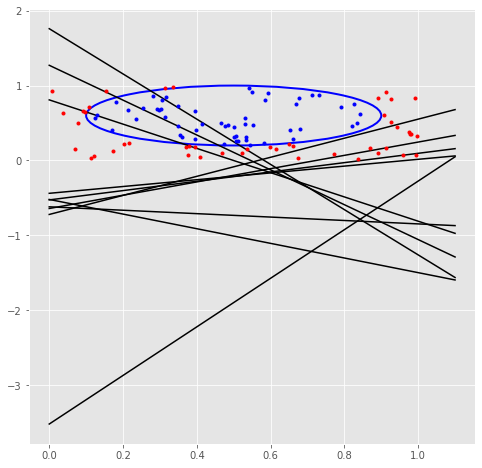

In [37]:
from matplotlib.patches import Circle, CirclePolygon
fig = plt.figure(figsize=[8,8])
ax = fig.gca()
crcl = Circle((0.5, 0.6), 0.4, fill=False, color='b', lw=2)
ax.add_artist(crcl)
for y in lines:
    plt.plot(x, y, color='k')
ones = array(list(filter(lambda d: d[2] == 1, data)))
plt.plot(ones[:,0], ones[:,1], '.', color='b')
zeros = array(list(filter(lambda d: d[2] == 0, data)))
plt.plot(zeros[:,0], zeros[:,1], '.', color='r')
# ax.set_ylim([0,1.1])
# ax.set_xlim([0,1.1])
plt.show()